# Import the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
df = pd.read_excel("C:\\Users\\deepthi\\Downloads\\HousePricePrediction.xlsx")

In [4]:
df.shape

(2919, 13)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [6]:
df.drop(columns='Id',axis=1,inplace=True)

In [7]:
df.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2919 non-null   int64  
 1   MSZoning      2915 non-null   object 
 2   LotArea       2919 non-null   int64  
 3   LotConfig     2919 non-null   object 
 4   BldgType      2919 non-null   object 
 5   OverallCond   2919 non-null   int64  
 6   YearBuilt     2919 non-null   int64  
 7   YearRemodAdd  2919 non-null   int64  
 8   Exterior1st   2918 non-null   object 
 9   BsmtFinSF2    2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
 11  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 273.8+ KB


In [9]:
df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


# Exploratory Data Analysis(EDA)

In [10]:
df.corr()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
MSSubClass,1.000000,-0.201730,-0.065625,0.034409,0.043315,-0.072530,-0.219965,-0.084284
LotArea,-0.201730,1.000000,-0.035617,0.024128,0.021612,0.084059,0.254138,0.263843
OverallCond,-0.065625,-0.035617,1.000000,-0.368477,0.047654,0.041501,-0.174002,-0.077856
YearBuilt,0.034409,0.024128,-0.368477,1.000000,0.612235,-0.027595,0.408515,0.522897
YearRemodAdd,0.043315,0.021612,0.047654,0.612235,1.000000,-0.062153,0.298107,0.507101
BsmtFinSF2,-0.072530,0.084059,0.041501,-0.027595,-0.062153,1.000000,0.089410,-0.011378
TotalBsmtSF,-0.219965,0.254138,-0.174002,0.408515,0.298107,0.089410,1.000000,0.613581
SalePrice,-0.084284,0.263843,-0.077856,0.522897,0.507101,-0.011378,0.613581,1.000000


In [16]:
df.isnull()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,False,False,False,False,False,False,False,False,False,False,False,True
2915,False,False,False,False,False,False,False,False,False,False,False,True
2916,False,False,False,False,False,False,False,False,False,False,False,True
2917,False,False,False,False,False,False,False,False,False,False,False,True


In [18]:
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

Here SalesPrice is the target column it should not be the null values. So we
Replacing SalePrice empty values with their mean values to make the data distribution symmetric.

In [19]:
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())

Drop records with null values (as the empty records are very less).

In [20]:
df=df.dropna()

In [21]:
df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

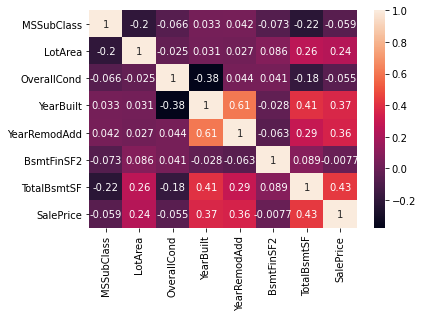

In [22]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# Visualize the dataset

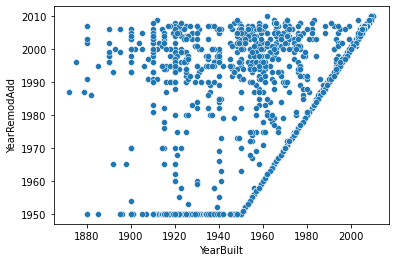

In [23]:
sns.scatterplot(data=df,x = 'YearBuilt', y = 'YearRemodAdd')
plt.show()

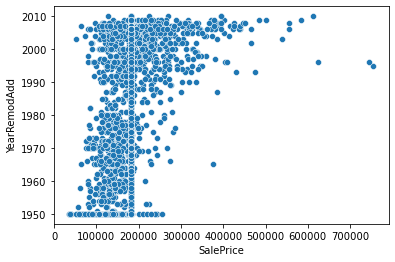

In [24]:
sns.scatterplot(data=df,x = 'SalePrice', y = 'YearRemodAdd')
plt.show()

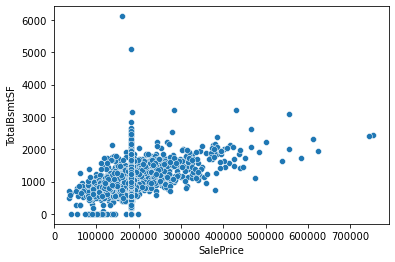

In [25]:
sns.scatterplot(data=df,x = 'SalePrice', y = 'TotalBsmtSF')
plt.show()

# OneHotEncoder – For Label categorical features

One hot Encoding is the best way to convert categorical data into binary vectors. 
This maps the values to integer values. By using OneHotEncoder, we can easily convert object data into int.
So for that, firstly we have to collect all the features which have the object datatype.

In [41]:
from sklearn.preprocessing import OneHotEncoder
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [46]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

# Splitting Dataset into Training and Testing

In [112]:
X = df_final.drop(['SalePrice'],axis=1)
Y = df_final['SalePrice']

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=0)

# Model Building with sklearn

In [114]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)

LinearRegression()

In [115]:
#m(slope)
model_LR.coef_

array([ 4.63938819e+02,  8.02992665e-01,  2.82096858e+03,  3.70353444e+02,
        3.44149273e+02, -9.86861567e+00,  4.30405890e+01,  6.15340805e+03,
        4.92440794e+02, -1.82811417e+03, -8.83719848e+02, -3.93401483e+03,
        1.55301690e+03,  7.38748572e+03, -1.72211190e+03, -8.14674882e+03,
        9.28358101e+02,  4.35978251e+04, -3.06683753e+04,  9.14917683e+03,
       -1.36111968e+04, -8.46742982e+03,  3.48983670e+02, -2.10530271e+04,
       -1.03217194e+04,  9.16283897e+03, -2.91038305e-11,  1.39438322e+03,
       -1.26813480e+04,  3.63797881e-12, -7.41253196e+03, -1.19677383e+04,
        6.58583191e+04,  8.32900978e+02, -6.49495524e+03, -1.56611353e+03,
       -6.09999238e+03])

In [116]:
#c(intercept)
model_LR.intercept_

-1355887.3649254157

In [117]:
y_pred = model_LR.predict(x_test)
print("Predicted: ",y_pred)

Predicted:  [191650.15923449 256694.21204008 172701.86041707 178271.40635751
 206419.73613526 197732.89101835 122841.48375806 157878.58934739
 191291.77887932 204804.03308353 150243.64027563 219384.08152954
 175255.50575308 146897.11420032 199206.87801954 140385.69033295
 168183.44447516 163859.73646193 199489.97467243 197189.64221705
 196128.98519652 133933.9044786  213384.66385957 171491.85738481
 134813.81633664 155413.33744835 147306.70226194 172544.46498721
 162993.16873966 149133.18652125 165985.90539425 190830.5097074
 163121.19310168 194180.0272962  173858.91795552 196437.34882538
 141050.11569807 164048.62478896 170097.87353521 168791.86980326
 213867.76779934 227566.00767484 225968.6660771  141556.62431201
 200123.25857304 221255.82922142 219628.05092849 112066.64524961
 170881.54038786 195695.22225926 199297.32301991 194250.64094596
 125567.52706621 153150.46411961 197129.20194131 152353.39846161
 135830.20477894 222158.33887991 182830.5698671  199591.81857295
 206995.281029

In [118]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,r2_score
print("Mean Absolute Error(MAE): ",mean_absolute_percentage_error(y_test, y_pred))
print("Mean Square Error(MSE): ",mean_squared_error(y_test,y_pred))
print("Root Mean Square Error(RMSE):",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score: ",r2_score(y_test,y_pred))

Mean Absolute Error(MAE):  0.18741683841600162
Mean Square Error(MSE):  1692380766.4526932
Root Mean Square Error(RMSE): 41138.555716659444
R2 Score:  0.37414227045743853
